# Histogram Correction
**Read and show the Airplane image at the output. Calculate and display the image histogram. Using the histogram equalization method, map the image and compare it with the image in the same way. Provide a report of comparison images and histograms of images.**

The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output
+ `time` for calculating elapsed times

In [180]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In the next lines, we will read the image in grayscale mode using `cv2.imread()` function.
Then it will be showed using `plt.imshow()` and `plt.imshow()` functions.

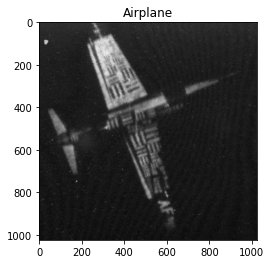

In [181]:
# Reading Airplane.tiff in grayscale mode
airplane = cv2.imread("../../images/Airplane.tiff", cv2.IMREAD_GRAYSCALE)

# Passing the image with gray cmap for showing
plt.imshow(airplane, cmap="gray")

# Showing the image
plt.title("Airplane")
plt.show()

This code snippet use cv2 built-in function for calculating the histogram of the original image. It also measure elapsed time and show it with histogram plot.

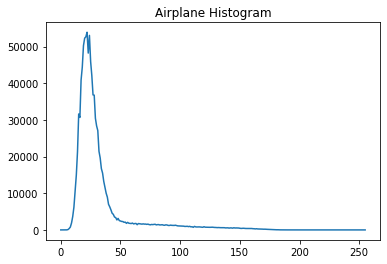

Elapsed time(ms): 0.0025441646575927734


In [196]:
# Calculating image histogram in grayscale mode, no mask, and 256 gray levels and bins
start = time.time()
airplane_histogram = cv2.calcHist([airplane], [0], None, [256], [0, 256])
elapsed_time = time.time() - start

# Showing histogram plot
plt.plot(airplane_histogram)
plt.title("Airplane Histogram")
plt.show()
print('Elapsed time(ms):', elapsed_time)

The following code snippet calculates the histogram as well.
First, we specify the number of bins.
Second, it will produce a zero matrix for speed of value assignments.
Next, it will count the number of each value using a mask.
It will also display histogram plot and elapsed time which is noticeably larger than `cv2.calcHist()`, but it roughly equals `pyplot.hist()` and `np.histogram()` time. 

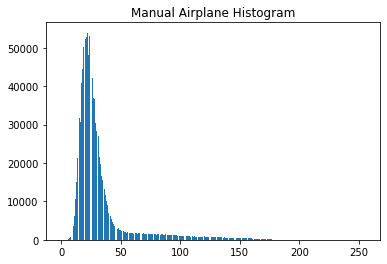

Elapsed time(ms): 0.24961543083190918


In [195]:
# Calculating histogram manually using mask arrays
bins = 256
# Preallocating array
manual_hist = np.zeros(bins, dtype=int)
step = int(256 / bins)
start = time.time()
for i in range(0, bins, step):
    # Generating boolean array and count the occurnes of numbers
    mask = (airplane == i)
    manual_hist[i] = mask.sum()
elapsed_time = time.time() - start

# Showing histogram plot
plt.bar(range(bins),manual_hist)
plt.title("Manual Airplane Histogram")
plt.show()
print('Elapsed time(ms):', elapsed_time)

The next code snippet consists of `cv2.equalizeHist()` which is calculating the equlized histogram and the corresponding image.

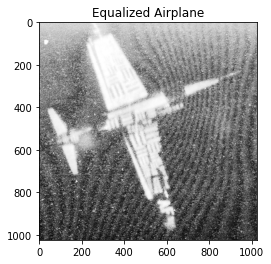

In [186]:
# Calculating equalizated image
airplane_equ = cv2.equalizeHist(airplane)

# Showing the image
plt.imshow(equ, cmap = "gray")
plt.title("Equalized Airplane")
plt.show()

The code snippet is calculating histogram of the equalized image above.

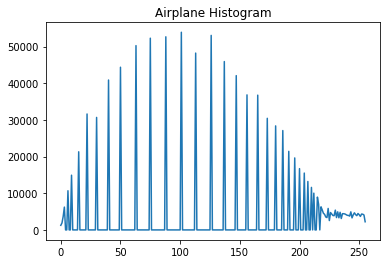

In [190]:
# Calculating image histogram in grayscale mode, no mask, and 256 gray levels and bins
airplane_equ_histogram = cv2.calcHist([airplane_equ], [0], None, [256], [0, 256])

# Showing histogram plot
plt.plot(airplane_equ_histogram)
plt.title("Airplane Histogram")
plt.show()

You can see the original image and equalized version and their histograms in the next cell.

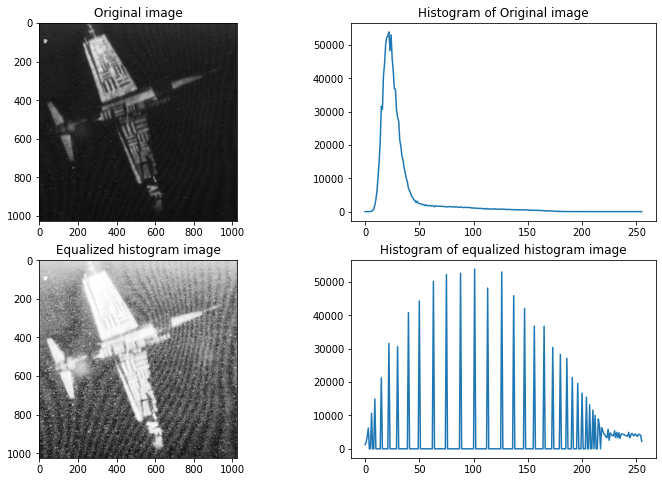

In [188]:
# Creating subplots
f, subplt = plt.subplots(2,2,figsize=(12,8))

# Original image
subplt[0,0].imshow(airplane,cmap='gray')
subplt[0,0].set_title("Original image")
# Original image histogram
subplt[0,1].plot(airplane_histogram)
subplt[0,1].set_title("Histogram of Original image")

# Equalized image
subplt[1,0].imshow(airplane_equ,cmap='gray')
subplt[1,0].set_title("Equalized histogram image")
# Equlized image histogram
subplt[1,1].plot(airplane_equ_histogram)
subplt[1,1].set_title("Histogram of equalized histogram image")

# Showing subplots
plt.show()

#### Conclusion
The original image of airplane is dark, so its histogram has skew and is leaning on the left side. Most of the pixels have a value between (10, 50), and the structure in the picture is hard to see due to its low brightness.

On the other hand, in the equalized version of the picture, we tend to stretch the histogram so the histogram covers all over the interval. It also has a lower contrast which is better and it helps us to perceive the key components of structure of the image better.

In Conclusion, the original image shows delicate details better (like sketching on the wings of airplane), but for perceiving the structure of the image equalized image is suitable.